In [1]:
from preamble import *

# Scaling

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

print("스케일 조정 전 특성별 최소값 : \n", X_train.min(axis=0))
print("스케일 조정 전 특성별 최대값 : \n", X_train.max(axis=0))
print("스케일 조정 후 특성별 최소값 : \n", X_train_scaled.min(axis=0))
print("스케일 조정 후 특성별 최대값 : \n", X_train_scaled.max(axis=0))

X_test_scaled = scaler.transform(X_test)
print("스케일 조정 후 특성별 최소값 : \n", X_test_scaled.min(axis=0))
print("스케일 조정 후 특성별 최대값 : \n", X_test_scaled.max(axis=0))

스케일 조정 전 특성별 최소값 : 
 [  6.981   9.71   43.79  143.5     0.053   0.019   0.      0.      0.106
   0.05    0.112   0.363   0.757   7.228   0.002   0.002   0.      0.
   0.008   0.001   7.93   12.02   50.41  185.2     0.071   0.027   0.
   0.      0.157   0.055]
스케일 조정 전 특성별 최대값 : 
 [  28.11    33.81   188.5   2501.       0.145    0.311    0.427    0.201
    0.304    0.097    2.873    4.885   21.98   542.2      0.023    0.106
    0.396    0.053    0.061    0.03    36.04    49.54   251.2   4254.
    0.223    1.058    1.252    0.29     0.664    0.207]
스케일 조정 후 특성별 최소값 : 
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
스케일 조정 후 특성별 최대값 : 
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
스케일 조정 후 특성별 최소값 : 
 [ 0.035  0.042  0.029  0.015  0.143  0.05   0.     0.     0.072  0.006
  0.001 -0.001  0.001 -0.001  0.051  0.014  0.     0.     0.042  0.011
  0.037  0.013  0.034  0.014  0.085  0.018  0.     0.   

# 주성분 분석(PCA)

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

cancer = load_breast_cancer()
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

pca = PCA(n_components=2)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)
print("원본 데이터 형태 : {}".format(str(X_scaled.shape)))
print("축소된 데이터 형태 : {}".format(str(X_pca.shape)))

원본 데이터 형태 : (569, 30)
축소된 데이터 형태 : (569, 2)


# KNN 얼굴인식(분류)

In [4]:
from sklearn.datasets import fetch_lfw_people
from sklearn.neighbors import KNeighborsClassifier

people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)

mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask]

X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("1-최근접 이웃의 테스트 세트 점수: {:.2f}".format(knn.score(X_test, y_test)))

1-최근접 이웃의 테스트 세트 점수: 0.23


# 화이트닝(Whitening) True

In [5]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("X_train_pca.shape:", X_train_pca.shape)
print("X_test_pca.shape:", X_test_pca.shape)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("테스트 세트 정확도: {:.2f}".format(knn.score(X_test_pca, y_test)))

X_train_pca.shape: (1547, 100)
X_test_pca.shape: (516, 100)
테스트 세트 정확도: 0.31


# 화이트닝(Whitening) False

In [6]:
pca = PCA(n_components=100, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("X_train_pca.shape:", X_train_pca.shape)
print("X_test_pca.shape:", X_test_pca.shape)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("테스트 세트 정확도: {:.2f}".format(knn.score(X_test_pca, y_test)))

X_train_pca.shape: (1547, 100)
X_test_pca.shape: (516, 100)
테스트 세트 정확도: 0.24


# NMF(Non-negative Matrix Factorization)

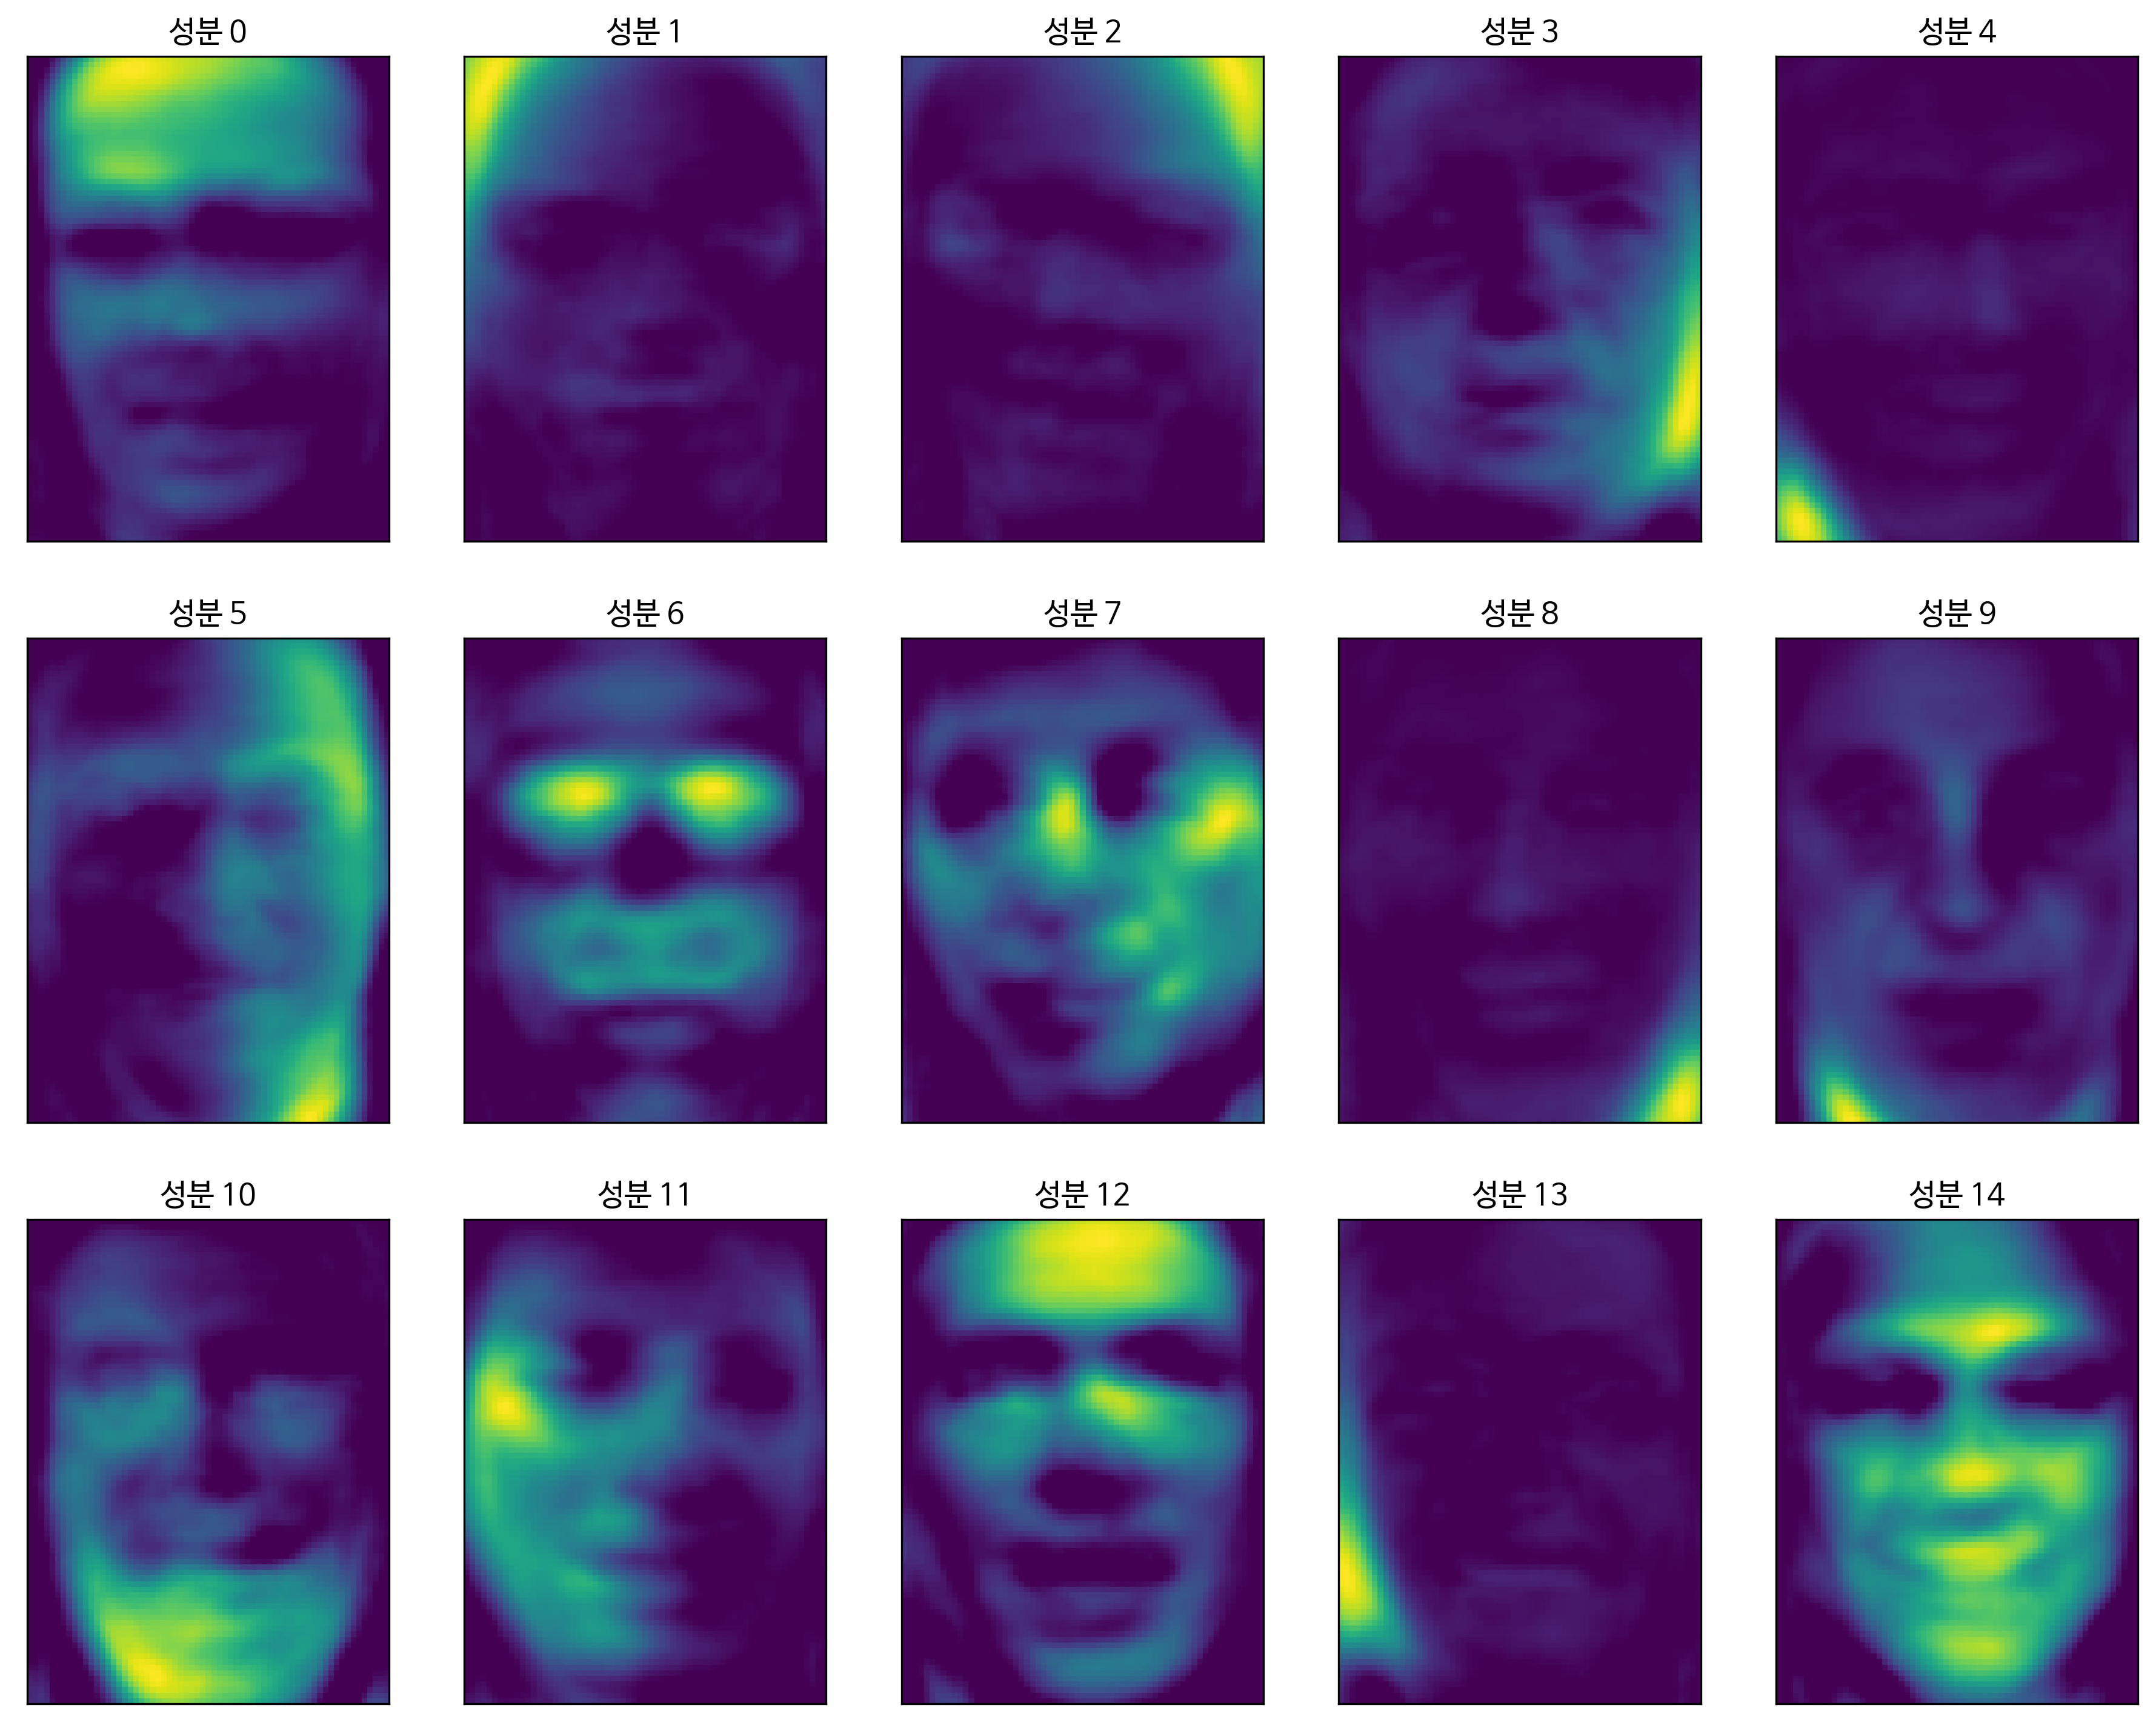

In [11]:
from sklearn.decomposition import NMF

image_shape = people.images[0].shape

nmf = NMF(n_components=15, init='nndsvd', random_state=0, max_iter=10000)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

fig, axes = plt.subplots(3, 5, figsize=(15, 12),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("성분 {}".format(i))

# t-SNE(t-Distributed Stochastic Neighbor Embedding)

Text(0, 0.5, 't-SNE 특성 1')

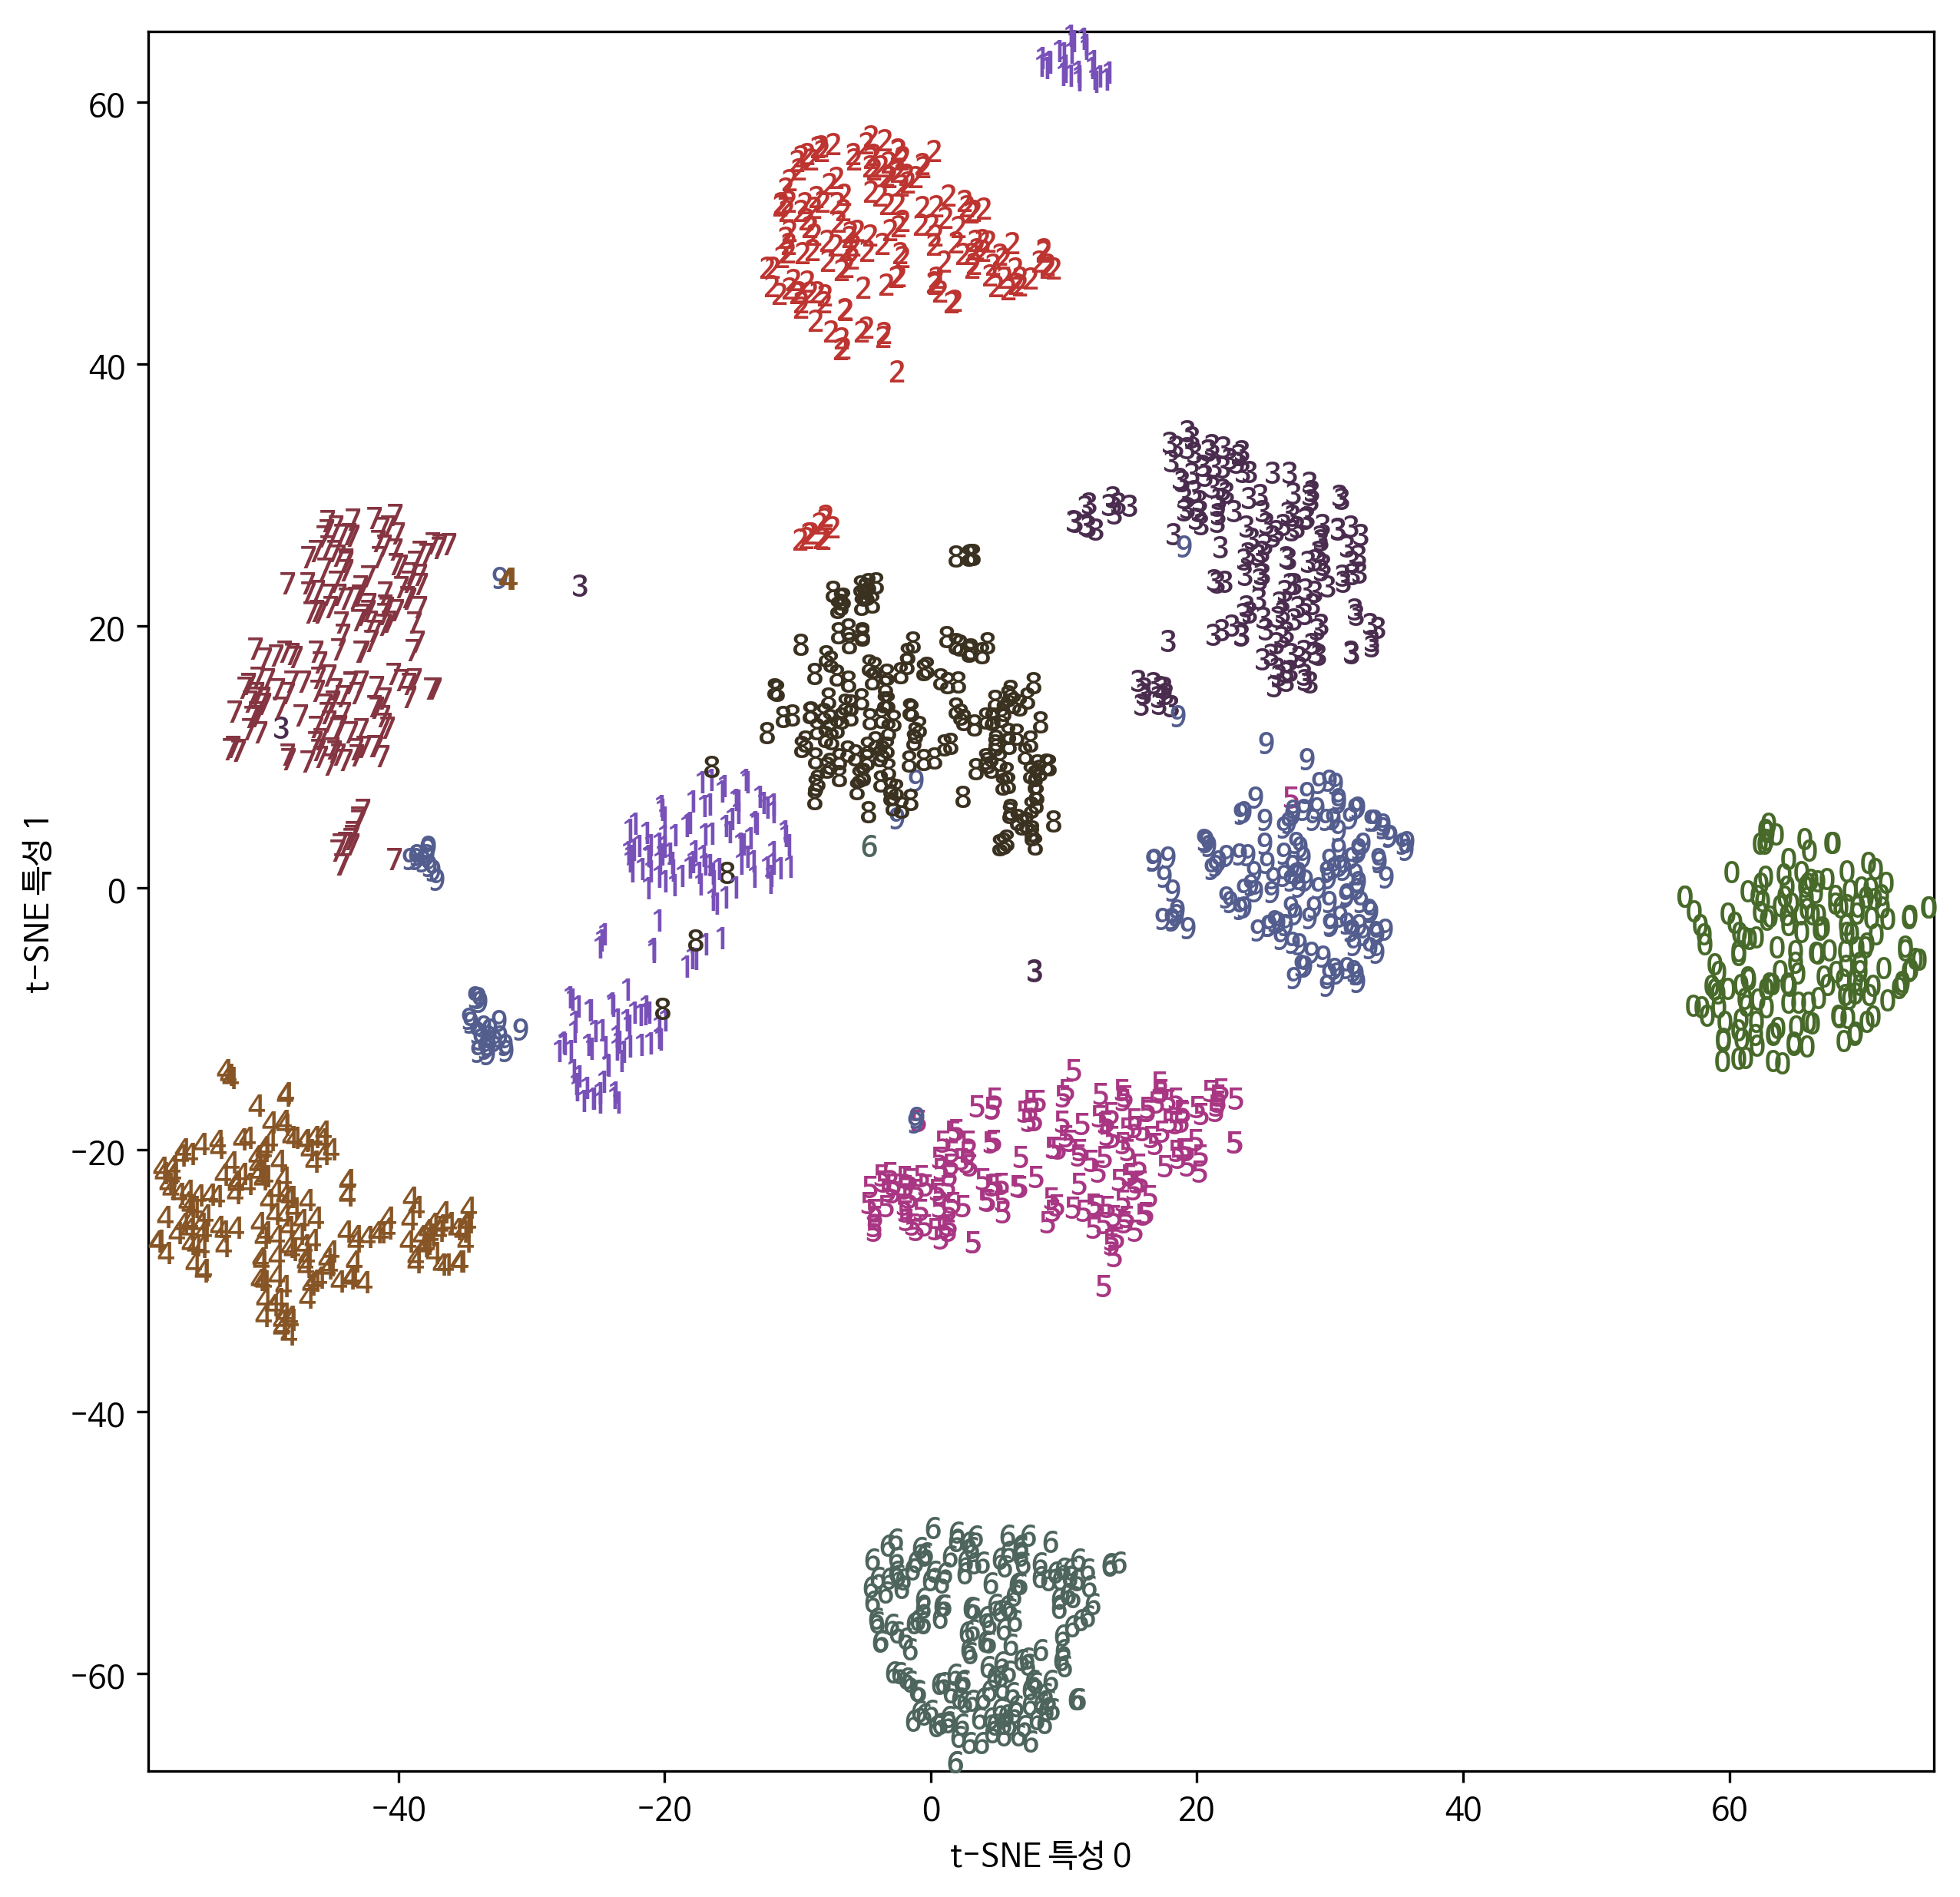

In [14]:
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE

digits = load_digits()

tsne = TSNE(random_state=42)
digits_tsne = tsne.fit_transform(digits.data)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120","#535D8E"]

plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)
for i in range(len(digits.data)):
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("t-SNE 특성 0")
plt.ylabel("t-SNE 특성 1")

# 군집(Clustering)

# K-Means

In [15]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 2차원 데이터를 생성
X, y = make_blobs(random_state=1)

# 군집 모델 생성
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

print(kmeans.labels_)

[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


# 병합군집(agglomerative clustering)

Text(0, 0.5, '특성 1')

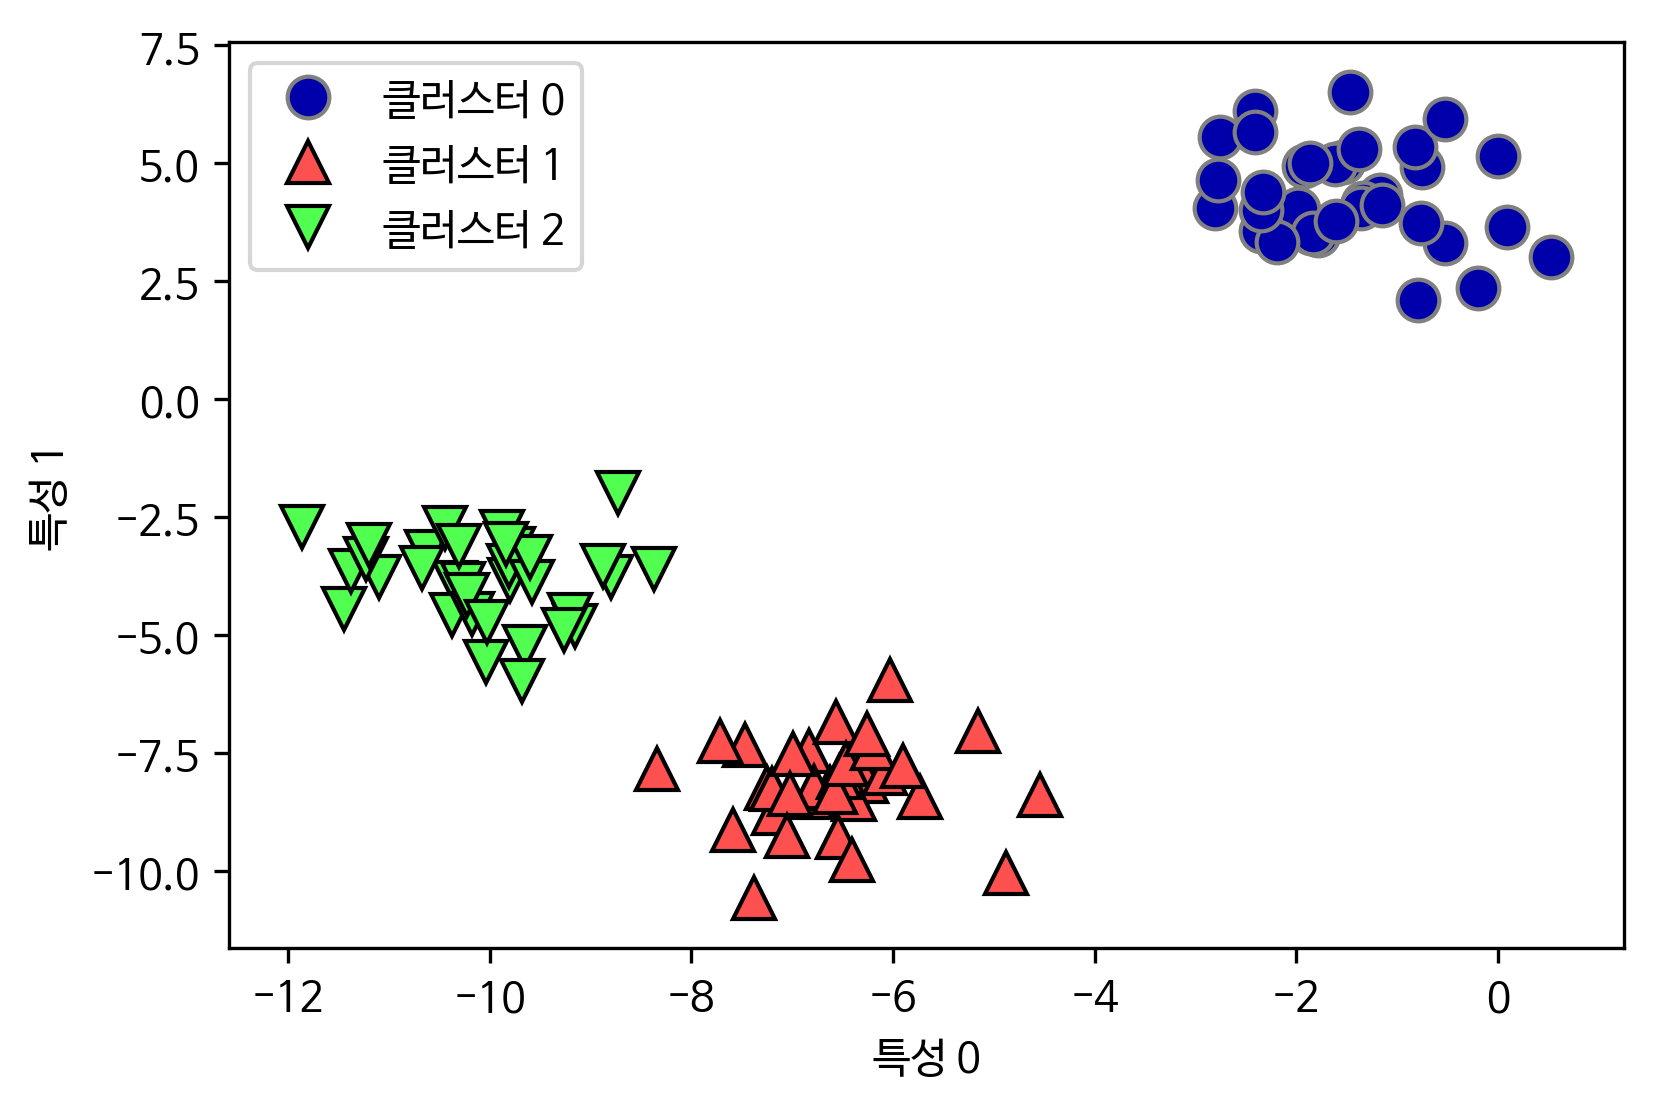

In [16]:
from sklearn.cluster import AgglomerativeClustering

X, y = make_blobs(random_state=1)

agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X)

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignment)
plt.legend(["클러스터 0", "클러스터 1", "클러스터 2"], loc="best")
plt.xlabel("특성 0")
plt.ylabel("특성 1")

# Dendrogram

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [10.0, 10.0, 32.5, 32.5],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [85.0, 85.0, 102.5, 102.5],
  [62.5, 62.5, 93.75, 93.75],
  [21.25, 21.25, 78.125, 78.125]],
 'dcoord': [[0.0, 0.3320945047164902, 0.3320945047164902, 0.0],
  [0.0, 0.9268322277319817, 0.9268322277319817, 0.0],
  [0.0, 1.6004181164464242, 1.6004181164464242, 0.9268322277319817],
  [0.3320945047164902,
   2.078157949404743,
   2.078157949404743,
   1.6004181164464242],
  [0.0, 1.1803786988620995, 1.1803786988620995, 0.0],
  [0.0, 1.3031157463723073, 1.3031157463723073, 1.1803786988620995],
  [0.0, 0.6458019336639491, 0.6458019336639491, 0.0],
  [0.0, 1.4440338959892802, 1.4440338959892802, 0.6458019336639491],
  [0.0, 2.1598188624745154, 2.1598188624745154, 1.4440338959892802],
  [1.3031157463723073,
   6.550248535823649,
   6.550248535823649,
   2.15

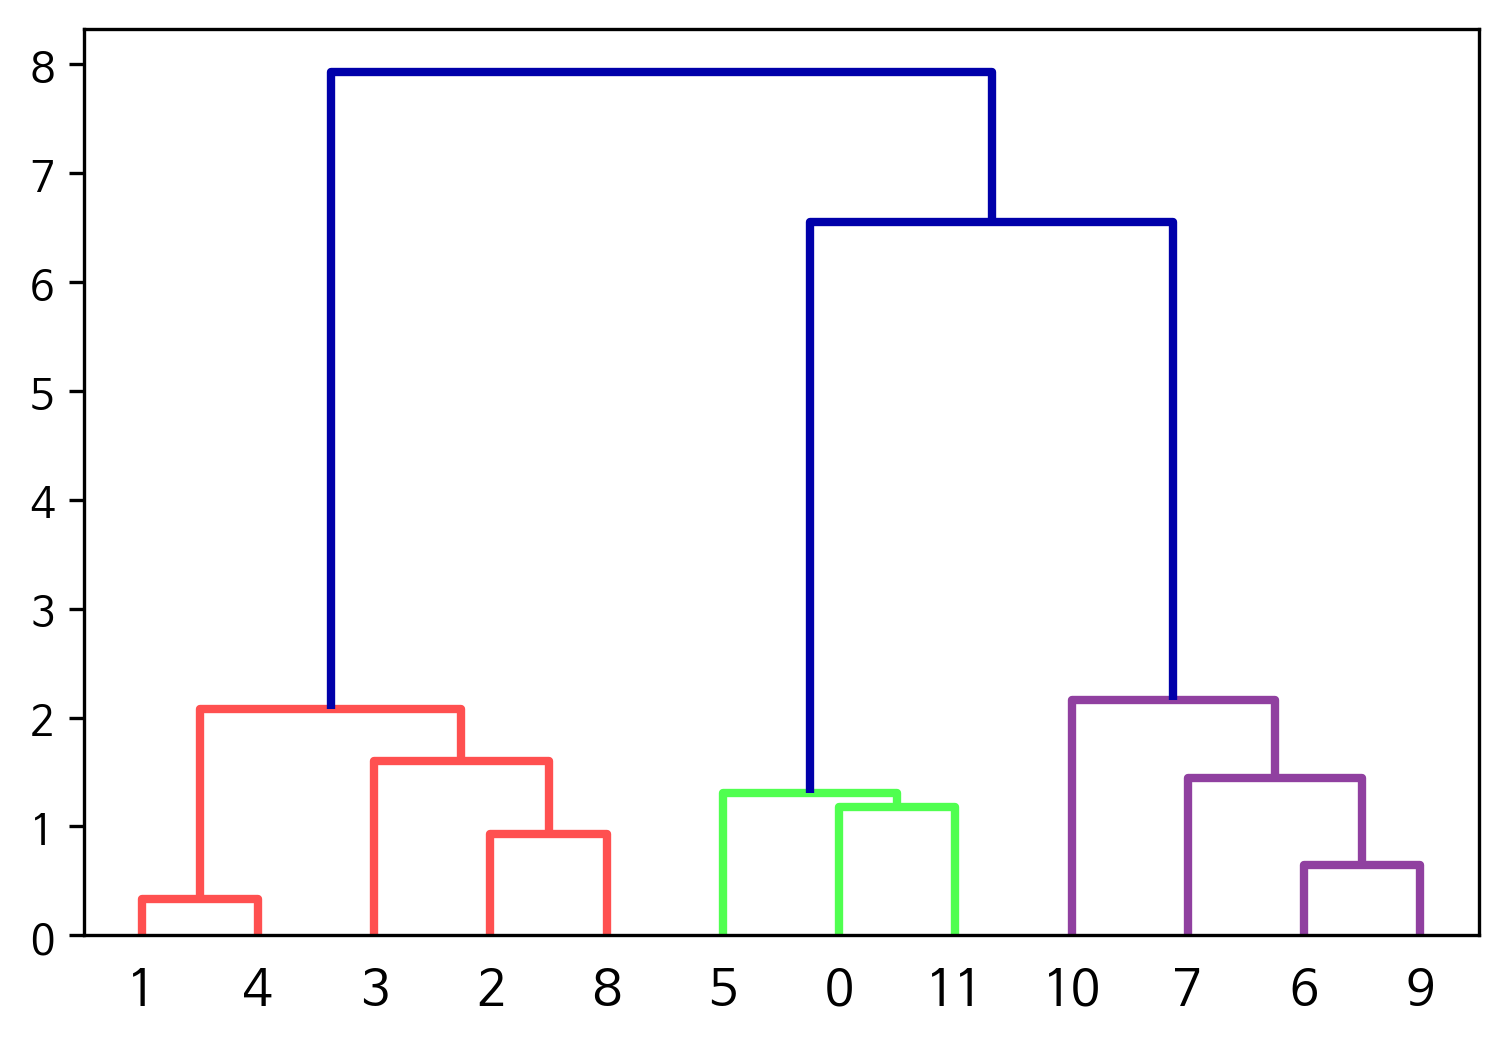

In [17]:
from scipy.cluster.hierarchy import dendrogram, ward

X, y = make_blobs(random_state=0, n_samples=12)

linkage_array = ward(X)
dendrogram(linkage_array)

# DBSCAN(Density-based spatial clustering of application with noise)

In [20]:
from sklearn.cluster import DBSCAN

X, y = make_blobs(random_state=0, n_samples=12)

dbscan = DBSCAN(min_samples=2, eps=1)
clusters = dbscan.fit_predict(X)
print("클러스터 레이블:\n", clusters)
dbscan = DBSCAN(min_samples=2, eps=1.5)
clusters = dbscan.fit_predict(X)
print("클러스터 레이블:\n", clusters)
dbscan = DBSCAN(min_samples=2, eps=2)
clusters = dbscan.fit_predict(X)
print("클러스터 레이블:\n", clusters)
dbscan = DBSCAN(min_samples=2, eps=3)
clusters = dbscan.fit_predict(X)
print("클러스터 레이블:\n", clusters)

클러스터 레이블:
 [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
클러스터 레이블:
 [0 1 1 1 1 0 2 2 1 2 2 0]
클러스터 레이블:
 [0 1 1 1 1 0 0 0 1 0 0 0]
클러스터 레이블:
 [0 0 0 0 0 0 0 0 0 0 0 0]


# 군집 평가

# ARI(adjusted rand index)

In [26]:
from sklearn.datasets import make_moons
from sklearn.metrics.cluster import adjusted_rand_score

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2),
              DBSCAN()]

for algorithm in algorithms:
    clusters = algorithm.fit_predict(X_scaled)
    print(adjusted_rand_score(y, clusters))

0.5015957062647948
0.6065184066117172
1.0


# 실루엣계수(Silhouette Coefficient)

In [28]:
from sklearn.metrics.cluster import silhouette_score

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2),
              DBSCAN()]

for algorithm in algorithms:
    clusters = algorithm.fit_predict(X_scaled)
    print(silhouette_score(X_scaled, clusters))

0.49304627727701233
0.4572323945292666
0.382386022679393
